# **Problem-1**

##  **Project 5.4**

In [171]:
import numpy as np
from math import floor, ceil
from PIL import Image

## **Part-A**

In [141]:
def filter2d(input_img, filter):
    """Apply a 2-d filter to a 2-d image."""
    M, N = input_img.shape  # M is height, N is width
    n, m = len(filter), len(filter[0])  # m is height, n is width
    a, b = m // 2, n // 2  # size of neighborhood
    #print(n,m, a, b)
    # get transpose of the 1-d filter
    if isinstance(filter, np.ndarray):
        wt = filter.ravel()
    else:
        wt = np.array(filter).ravel()

    def correlate(x, y):
        # z = np.zeros(n * m)  # pad with zeros
        z = np.full(n * m, input_img[x, y])  # pad with border duplicates
        #print(z.shape, z.size)
        # fill in available neighborhood
        for i in range(int(x - a), int(x + a + 1)):
            for j in range(int(y - b), int(y + b + 1)):
                if i >= 0 and i < M and j >= 0 and j < N:
                    z[int((i - x + a) * n + j - y + b)-1] = input_img[i, j]
        return np.dot(wt, z)

    # apply to each pixel
    xx, yy = np.meshgrid(range(M), range(N), indexing='ij')
    #print(xx.shape, yy.shape)
    vf = np.vectorize(correlate)
    return vf(xx, yy)

In [142]:
def img_to_array(img, dtype=None):
    if img.mode == 'RGB':
        # convert each channel to a numpy array
        return [img_to_array(ch) for ch in img.split()]
    else:
        return np.array(img.getdata(), dtype=dtype).reshape(img.size[::-1])

In [143]:
def array_to_img(data, mode=None):
    if not mode:
        return Image.fromarray(data)
    elif mode == 'RGB':
        channels = [array_to_img(ch, 'L') for ch in data]
        return Image.merge('RGB', channels)
    else:
        return Image.fromarray(data).convert(mode)

In [144]:
def arithmetic_mean(img, size, raw=False):
    m, n = size
    kernel = np.full((m, n), float(1) / (m * n))  # denominator
    data = img if raw else img_to_array(img)

    if raw:
        return filter2d(data, kernel)
    else:
        return array_to_img(filter2d(data, kernel), img.mode)

## **Part-B**

In [145]:
def harmonic_mean(img, size):
    data = img_to_array(img, dtype=np.float64)
    inverse = np.reciprocal(data)
    result = np.reciprocal(arithmetic_mean(inverse, size, True))
    return array_to_img(result, img.mode)

## **Part-C**

In [146]:
def contraharmonic_mean(img, size, Q):
    data = img_to_array(img, dtype=np.float64)
    numerator = np.power(data, Q + 1)
    denominator = np.power(data, Q)
    kernel = np.full(size, 1.0)
    result = filter2d(numerator, kernel) / filter2d(denominator, kernel)
    return array_to_img(result, img.mode)

## **Part-D**

In [152]:
def geometric_mean(input_img, size):
    data = img_to_array(input_img, dtype=np.float64)
    M, N = data.shape 
    m, n = size 
    a, b = m // 2, n // 2

    def get_gmean(x, y):
        z = np.full(n * m, data[x, y])  
        for i in range(int(x - a), int(x + a + 1)):
            for j in range(int(y - b), int(y + b + 1)):
                if i >= 0 and i < M and j >= 0 and j < N:
                    z[(i - x + a) * n + j - y + b] = data[i, j]
        return np.prod(np.power(z, 1.0 / (m * n)))
    xx, yy = np.meshgrid(range(M), range(N), indexing='ij')
    vf = np.vectorize(get_gmean)
    return array_to_img(vf(xx, yy), input_img.mode)

In [153]:
img = Image.open("circuitboard-gaussian.tif")

In [163]:
s = (3,3)

## **Part-E**

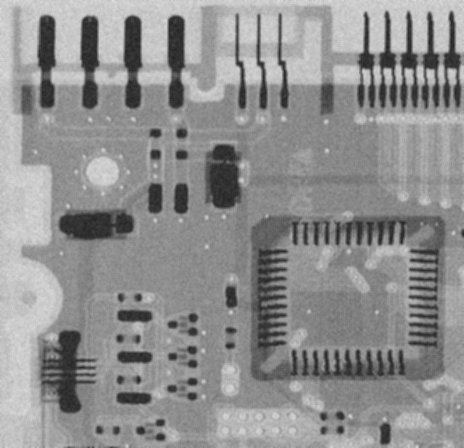

In [164]:
arithmetic_mean(img, s)

## **Part-F**

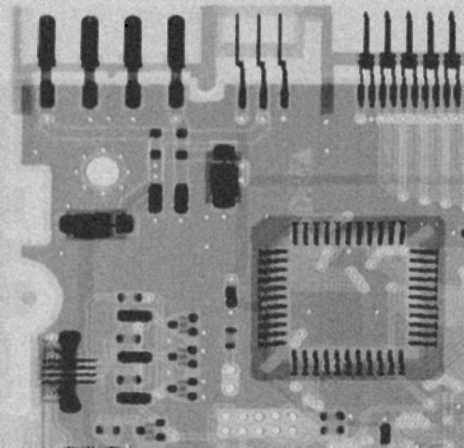

In [165]:
geometric_mean(img, s)

## **Part-G**

In [166]:
img1 = Image.open("circuitboard-pepper.tif")

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


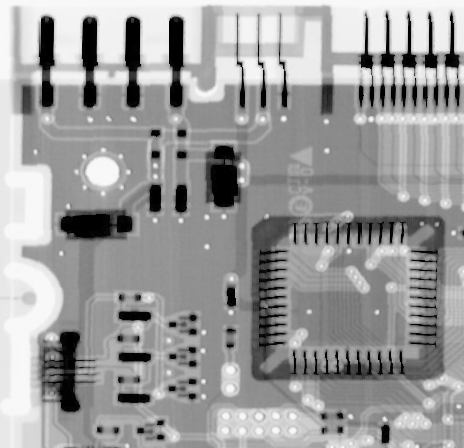

In [168]:
contraharmonic_mean(img1, s, 1.5)

## **Part-H**

In [169]:
img2 = Image.open("circuitboard-salt.tif")

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


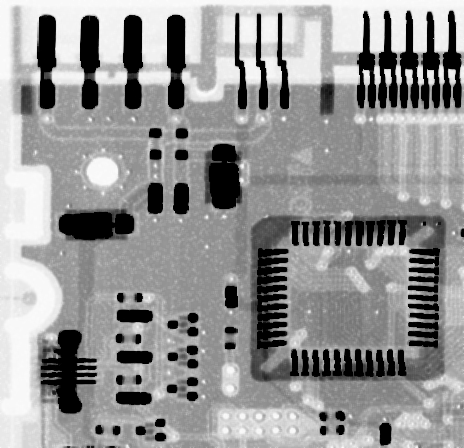

In [170]:
contraharmonic_mean(img2, s, -1.5)